<a href="https://colab.research.google.com/github/lcfdiniz/puc-rio/blob/main/bank-customer-churn/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Predição de churn para clientes de banco

por [Lucas Fiorani Diniz](https://www.linkedin.com/in/lcfdiniz/)

## Definição do Problema

A taxa de churn (*churn rate*) é uma métrica que aponta a rotatividade dos clientes de uma empresa, ou de forma mais direta, o número de clientes que deixaram de fazer negócios com a empresa em um determinado período de tempo.

Entre as maneiras de se reduzir o churn de uma empresa, estão o entendimento dos motivos do cancelamento e identificação dos clientes com maior chance de ir embora.

Com essa abordagem, é possível realizar ações preventivas efetivas, que mantenham os clientes na base por mais tempo. O investimento na predição de churn e consequente retenção de clientes é extremamente eficiente, dado que o custo para se adquirir um novo cliente pode ser de 5 a 7 vezes maior do que manter um atual. [[1]](https://jrs.digital/conquistar-um-novo-cliente-custa-entre-5-a-7-vezes-mais-que-manter-um-atual/#:~:text=Segundo%20o%20economista%20americano%20Philip,de%20clientes%2C%20usu%C3%A1rios%20e%20compradores.)

Nesse sentido, técnicas de Machine Learning possuem um grande potencial de identificar com sucesso os fatores que levam aos cancelamentos dos serviços e os clientes com maior probabilidade de se tornarem churn.

Para o caso das instituições bancárias, altas taxas de churn podem impactar diretamente sua receita e rentabilidade. Entre os motivos para que um cliente possa decidir encerrar sua conta bancária ou deixar de utilizar os serviços de um banco, estão:

- Insatisfação com os serviços oferecidos;
- Má experiência com os produtos financeiros;
- Concorrência;
- Mudanças nas circunstâncias pessoais do cliente.

Caso essas instituições sejam capazes de identificar as causas e clientes com maior potencial de churn, é possível adotar estratégias como:

- Melhoria dos serviços;
- Personalização de ofertas e recomendações;
- Programas de fidelidade e recompensa;
- Monitoramento proativo.

### Levantamento de hipóteses

Considerando o contexto apresentado acima, é possível levantar as seguintes hipóteses a respeito da relação dos clientes de uma instituição bancária e a taxa de churn da mesma:

- Os clientes com uma maior pontuação de crédito são menos propensos a deixarem o banco;

- Os clientes com maior idade são menos propensos a deixarem o banco;

- Os clientes com contas mais antigas são mais leais e, portanto, são menos propensos a deixarem o banco;

- Os clientes que utilizam cartão de crédito são menos propensos a deixarem o banco;

- Os clientes mais ativos são menos propensos a deixarem o banco;

- Os clientes com reclamações mal-solucionadas são mais propensos a deixarem o banco.

### Restrições e condições respeitadas

Para se obter os dados do problema, a plataforma [Kaggle](https://www.kaggle.com/datasets) foi consultada. O Kaggle é a maior comunidade online de cientistas de dados e praticantes de Machine Learning, disponibilizando recursos valiosos para seus usuários, como datasets variados.

O melhor dataset encontrado para o problema foi o [*Bank Customer Churn*](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?select=Customer-Churn-Records.csv). Esse conjunto de dados possui registros do mês de abril de 2022, sendo portanto bastante recente. Cada entrada desse dataset representa um cliente, e para cada um desses estão disponíveis diversas features descrevendo variáveis demográficas, comportamentais e se o mesmo deixou a empresa no mês avaliado (variável alvo).

Sendo assim, algumas considerações devem ser feitas:

- O modelo pode sofrer um viés em relação ao mês no qual os dados foram obtidos. É possível que a taxa de churn seja distinta de acordo com o mês avaliado, bem como os motivos por trás desse indicador;

- A localização geográfica dos clientes e das instituições bancárias é um fator importante. O dataset utilizado apresenta informações demográficas de clientes em países europeus, e portanto sujeitas às particularidades dessas regiões;

- Ainda, é possível que o comportamento dos clientes (serviços utilizados, confiança em bancos e a própria educação financeira) em países europeus seja diferente daquele observado para clientes sul-americanos;

- Por fim, existem fatores não englobados pelos dados disponibilizados, e que podem influenciar na decisão de um cliente em deixar a instituição bancária. Entre esses, estão possíveis ofertas agressivas da concorrência, condição econômica global e motivações no âmbito pessoal/particular.

### Dataset utilizado

In [49]:
# Insere a URL onde os dados foram disponibilizados (repositório do GitHub)
url = "https://raw.githubusercontent.com/lcfdiniz/puc-rio/main/bank-customer-churn/data/customer-churn-records.csv"

In [50]:
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

O dataset utilizado é composto por 10.000 entradas de dados e 18 features, sendo 14 representadas por valores numéricos (2 por números de ponto flutuante e 12 por números inteiros) e 4 representadas por valores categóricos. Não existem valores faltantes no conjunto de dados.

In [52]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [53]:
df.describe(include="object")

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [54]:
def get_unique_values(df, col):
  print(f"Valores únicos da feature {col}:")
  print(df[col].unique())
  print("\n")

In [55]:
get_unique_values(df, "Geography")
get_unique_values(df, "Gender")
get_unique_values(df, "Card Type")

Valores únicos da feature Geography:
['France' 'Spain' 'Germany']


Valores únicos da feature Gender:
['Female' 'Male']


Valores únicos da feature Card Type:
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']




A descrição de cada uma das features pode ser vista abaixo:

- `RowNumber`: número da linha ou registro, não afetando a permanência ou não do cliente;

- `CustomerId`: Id do cliente, sendo esse um número aleatório que também não afeta a permanência ou não do cliente;

- `Surname`: sobrenome do cliente;

- `CreditScore`: score de crédito do cliente;

- `Geography`: localização do cliente, sendo essa uma entre França, Espanha ou Alemanha;

- `Gender`: gênero do cliente;

- `Age`: idade do cliente;

- `Tenure`: número de anos em que o cliente encontra-se vinculado ao banco;

- `Balance`: saldo da conta do cliente (em euros, provavelmente);

- `NumOfProducts`: número de produtos que o cliente aderiu através do banco;

- `HasCrCard`: se o cliente possui (1) ou não (0) cartão de crédito;

- `IsActiveMember`: se o cliente é um membro ativo (1) ou não (0). Os critérios para essa feature não foram especificados pelo fornecedor do conjunto de dados;

- `EstimatedSalary`: salário estimado do cliente (em euros, provavelmente);

- `Exited`: variável alvo, que indica se o cliente deixou o banco (1) ou não (0) no mês avaliado;

- `Complain`: se o cliente realizou reclamações (1) ou não (0);

- `Satisfaction Score`: nota de satisfação fornecida pelo cliente para a resolução de sua reclamação;

- `Card Type`: tipo de cartão que o cliente possui, podendo ser um entre Diamond, Gold, Silver e Platinum;

- `Points Earned`: pontos ganhos pelo cliente pelo uso do cartão de crédito.

O atributo `Exited` será utilizado como a variável alvo do problema de Machine Learning, sendo essa responsável por indicar se o cliente se tornou um churn (1) ou não (0) no mês avaliado. Portanto, o modelo desenvolvido deverá responder um problema de classificação binária.

## Preparação de Dados

Na etapa de preparação dos dados, os dados brutos serão transformados em um formato mais apropriado para a modelagem. Para isso, deve-se verificar a existência ou não de dados faltantes ou discrepantes (*outliers*), realizar as transformações adequadas aos dados e a selecionar os atributos mais relevantes ao problema.

De antemão, sabe-se que os atributos `RowNumber` e `CustomerId` não carregam consigo informação discriminante para o problema, e portanto podem ser removidas do conjunto de dados utilizado.

Iniciaremos com a divisão do conjunto de dados entre treinamento e teste:

In [56]:
test_size = 0.2 # tamanho do conjunto de teste

X = df.drop(["RowNumber", "CustomerId", "Exited"], axis=1).to_numpy()
y = df["Exited"].to_numpy()

Um ponto importante nessa etapa é a verificação do desbalanceamento do conjunto de dados utilizado, o que é indicado pela distribuição das classes da variável alvo.

In [57]:
def display_proportion(df, var):
  plt.figure(figsize=(4, 3))
  ax = sns.barplot(x=df[var].value_counts().index,
                  y=df[var].value_counts(normalize=True).values)
  plt.title(f"Atributo {var}")
  for i, v in enumerate(df[var].value_counts(normalize=True).values):
      ax.text(i, v+.01, f"{v:.1f}%", horizontalalignment='center')

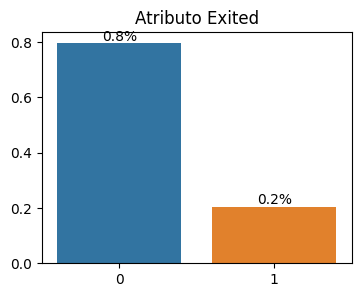

In [58]:
display_proportion(df, "Exited")

O quantitativo de 20% para a classe minoritária indica um desbalanceamento leve, onde técnicas de amostragem podem ou não ser aplicadas. Em um primeiro momento, será considerado que os modelos utilizados são capazes de lidar com o desequilíbrio de proporções do conjunto de dados original.

In [59]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=True, random_state=seed,
                                                    stratify=y)

Para a divisão dos dados em treinamento e teste, foi aplicada a técnica *holdout* com estratificação baseada na variável alvo, o que garante que as proporções de registros com churn ou não seja aproximadamente igual nas duas bases.

Ainda nessa etapa, é fundamental se atentar ao problema conhecido como *data leakage* ou vazamento de dados. Isso ocorre quando as informações da base de teste são incorretamente absorvidas durante a fase de treino, resultando em uma estimativa enviesada e incorreta do desempenho de um modelo.

Para evitar o *data leakage*, deverá ser garantido que os parâmetros utilizados para a prepação de dados sejam extraídos apenas do conjunto de treino, sendo estes aproveitados na preparação do conjunto de dados de teste.

In [60]:
def plot_distribution(df, vars):
  if isinstance(vars, str):
    vars = [vars]
  for var in vars:
    fig, axes = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={'height_ratios': [4, 1]})
    sns.histplot(data=df, x=var, kde=True, ax=axes[0])
    sns.boxplot(data=df, x=var, ax=axes[1])
    plt.suptitle(f"Atributo {var}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

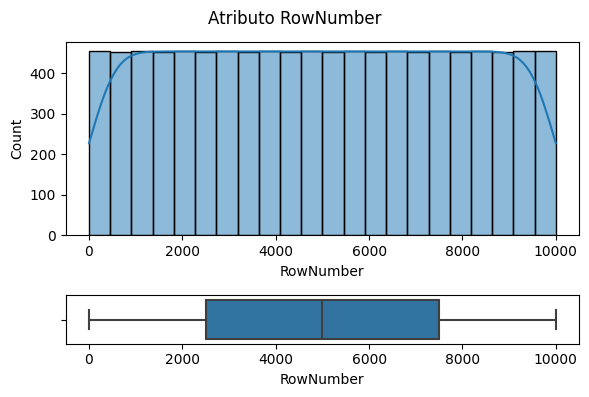

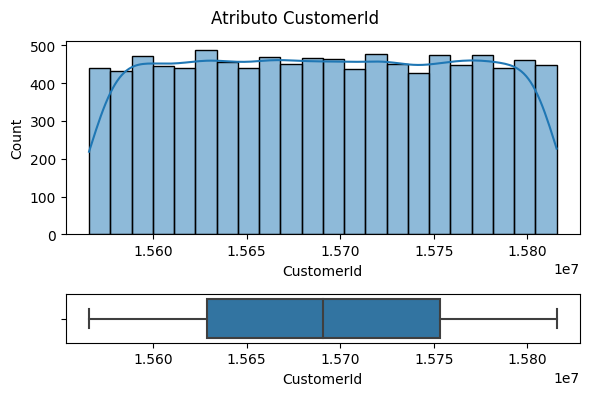

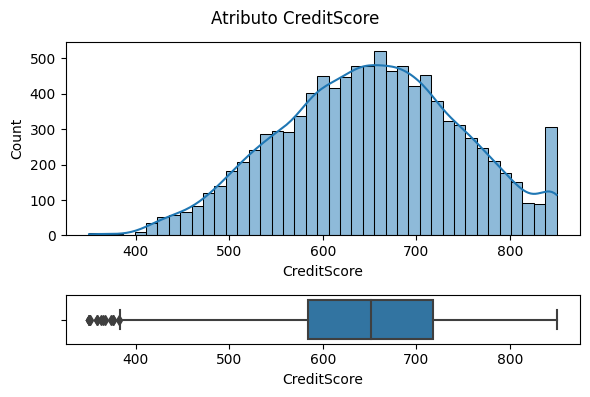

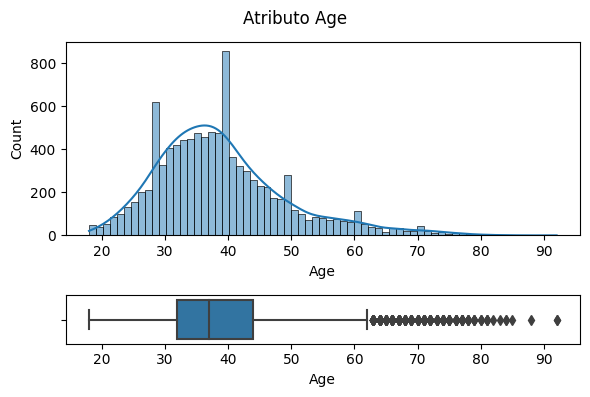

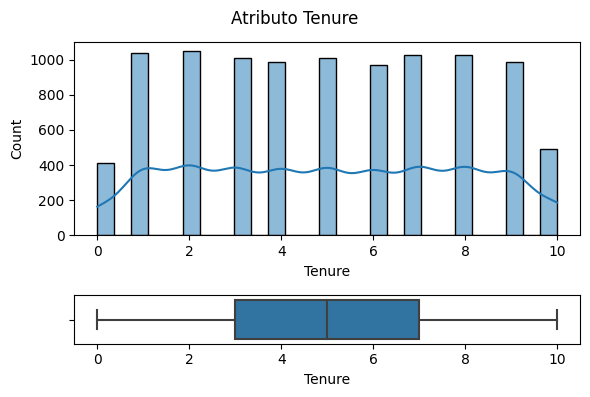

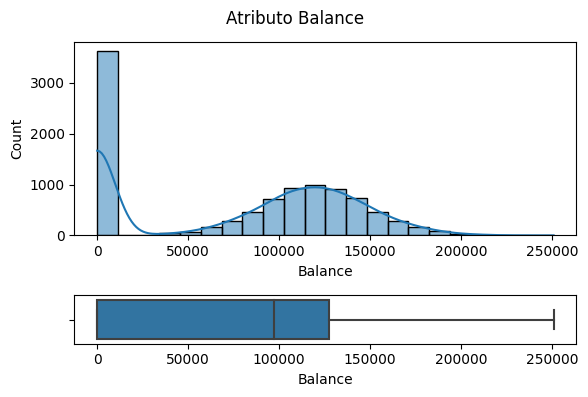

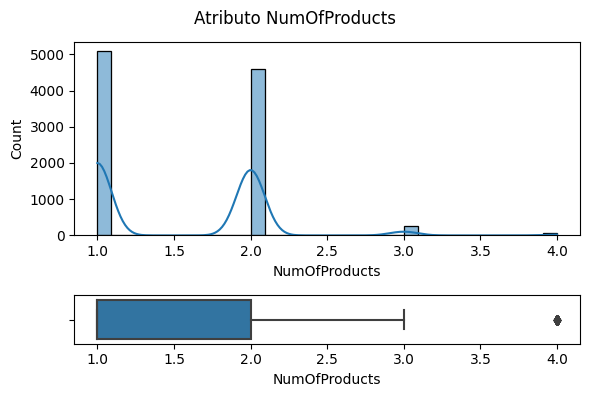

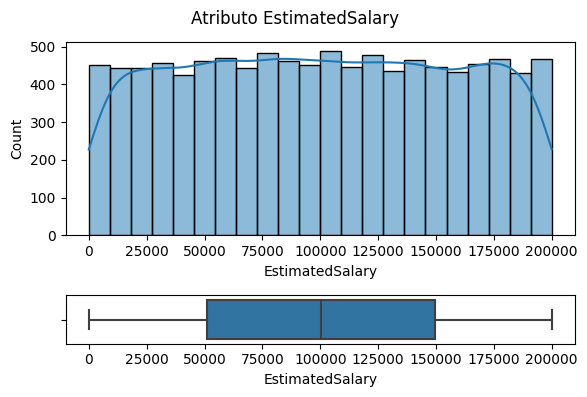

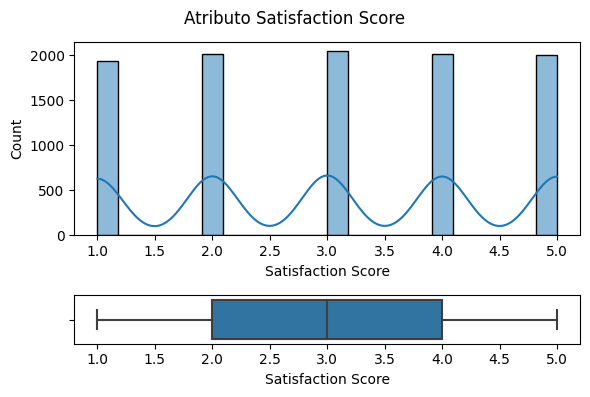

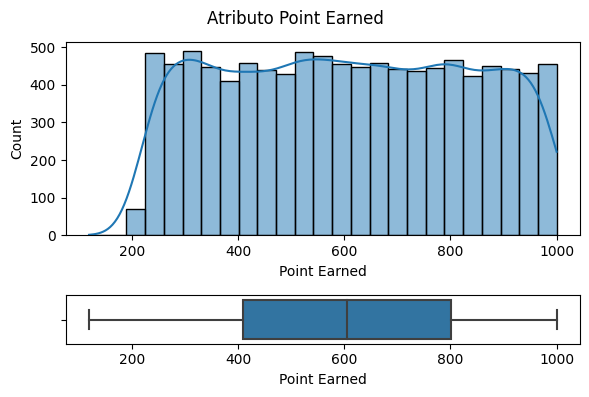

In [61]:
bool_vars = ["HasCrCard", "IsActiveMember", "Exited", "Complain"]
num_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
plot_distribution(df, [x for x in num_vars if x not in bool_vars])

## Modelagem e Treinamento

## Avaliação de Resultados